# STEP 1: Import Libraries


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime


# STEP 2: Load Food-Calorie Dataset

In [13]:
df = pd.read_csv("/content/drive/MyDrive/Food and Calories - Sheet1.csv")

# Clean Calories column (remove ' cal' and convert to int)
df["Calories"] = df["Calories"].str.replace(" cal", "").astype(int)

print("Sample from Food-Calorie Dataset:")
print(df.head())

Sample from Food-Calorie Dataset:
        Food              Serving  Calories
0  Artichoke  1 artichoke (128 g)        60
1    Arugula         1 leaf (2 g)         1
2  Asparagus       1 spear (12 g)         2
3  Aubergine  1 aubergine (458 g)       115
4   Beetroot        1 beet (82 g)        35


# STEP 3: Create / Update Diet Log


In [14]:
try:
    log = pd.read_csv("diet_log.csv")
except:
    log = pd.DataFrame(columns=["Date","Meal","Food","Calories"])

# STEP 3a: Helper Function to Add Meals

In [15]:
def add_meal(meal, food, date=None):
    """
    Add a new meal entry to the diet log.
    Calories will be fetched from the Food-Calorie dataset automatically.
    """
    global log
    if date is None:
        date = datetime.date.today()

    # Fetch calories from food dataset
    food_cal = df[df["Food"].str.lower() == food.lower()]["Calories"].values
    if len(food_cal) > 0:
        calories = food_cal[0]
    else:
        calories = 0  # default if food not found

    new_entry = {
        "Date": date,
        "Meal": meal,
        "Food": food,
        "Calories": calories
    }

    log = pd.concat([log, pd.DataFrame([new_entry])], ignore_index=True)
    log.to_csv("diet_log.csv", index=False)
    print(f"✅ Added: {meal} - {food} ({calories} cal) on {date}")


# STEP 3b: Add Some Sample Meals

In [16]:
add_meal("Breakfast", "Poha")
add_meal("Lunch", "Rice")
add_meal("Snack", "Chips")
add_meal("Dinner", "Chapati")
add_meal("Lunch", "Pasta", date="2025-08-22")

print("\nLatest Diet Log Entries:")
print(log.tail())

✅ Added: Breakfast - Poha (0 cal) on 2025-08-22
✅ Added: Lunch - Rice (0 cal) on 2025-08-22
✅ Added: Snack - Chips (0 cal) on 2025-08-22
✅ Added: Dinner - Chapati (0 cal) on 2025-08-22
✅ Added: Lunch - Pasta (0 cal) on 2025-08-22

Latest Diet Log Entries:
          Date       Meal     Food  Calories
35  2025-08-22  Breakfast     Poha         0
36  2025-08-22      Lunch     Rice         0
37  2025-08-22      Snack    Chips         0
38  2025-08-22     Dinner  Chapati         0
39  2025-08-22      Lunch    Pasta         0


# Add 7 days of sample meals

In [17]:
import random

meals = ["Breakfast", "Lunch", "Snack", "Dinner"]
foods = ["Poha", "Rice", "Chapati", "Pasta", "Chips", "Salad", "Fruits", "Oats"]

sample_data = []
for day in range(1, 8):   # 7 days
    date = f"2025-08-{day:02d}"
    for meal in meals:
        food = random.choice(foods)
        cal = random.randint(150, 600)  # random calories
        sample_data.append({"Date": date, "Meal": meal, "Food": food, "Calories": cal})

# Append to diet_log.csv
log = pd.concat([log, pd.DataFrame(sample_data)], ignore_index=True)
log.to_csv("diet_log.csv", index=False)

print("✅ Added 7 days of sample meal data")
print(log.tail())

✅ Added 7 days of sample meal data
          Date       Meal     Food  Calories
63  2025-08-06     Dinner     Oats       477
64  2025-08-07  Breakfast  Chapati       515
65  2025-08-07      Lunch     Poha       263
66  2025-08-07      Snack     Oats       335
67  2025-08-07     Dinner     Rice       173


# STEP 4: Daily Total Calories


In [18]:
if not log.empty:
    daily_calories = log.groupby("Date")["Calories"].sum()
    print("\nDaily Calorie Intake:")
    print(daily_calories)
else:
    print("\nNo log data available yet.")


Daily Calorie Intake:
Date
2025-08-22       0
2025-08-01    2557
2025-08-02    2698
2025-08-03    2549
2025-08-04    2972
2025-08-05    2993
2025-08-06    3246
2025-08-07    3178
2025-08-22       0
Name: Calories, dtype: int64


# STEP 5: Meal-wise Calorie Share

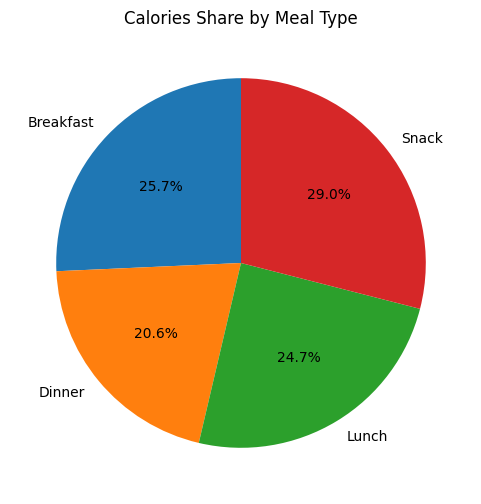

In [19]:
meal_share = log.groupby("Meal")["Calories"].sum()
meal_share = meal_share[meal_share > 0]  # remove empty meals

if len(meal_share) > 0:
    plt.figure(figsize=(6,6))
    plt.pie(meal_share, labels=meal_share.index, autopct="%1.1f%%", startangle=90)
    plt.title("Calories Share by Meal Type")
    plt.show()
else:
    print("⚠️ No meal data to display for pie chart.")

# STEP 6: Weekly Calorie Trend

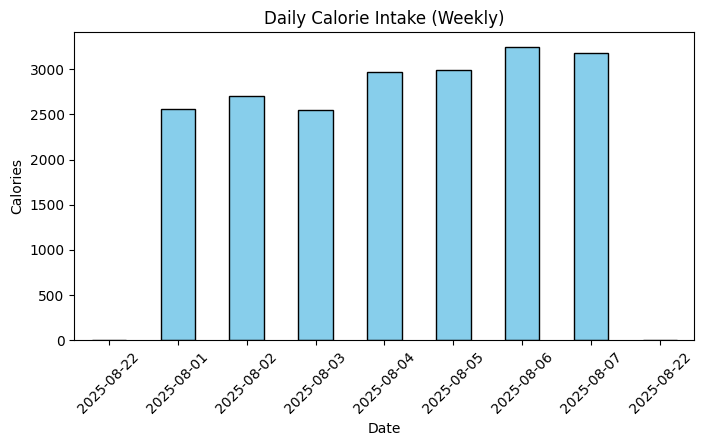

In [20]:
if not log.empty:
    # Ensure Calories is numeric
    log["Calories"] = pd.to_numeric(log["Calories"], errors="coerce").fillna(0).astype(int)

    weekly_calories = log.groupby("Date")["Calories"].sum()

    plt.figure(figsize=(8,4))
    weekly_calories.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Daily Calorie Intake (Weekly)")
    plt.ylabel("Calories")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("⚠️ No data for weekly calorie trend.")

# STEP 7: Top 5 Highest Calorie Foods Eaten

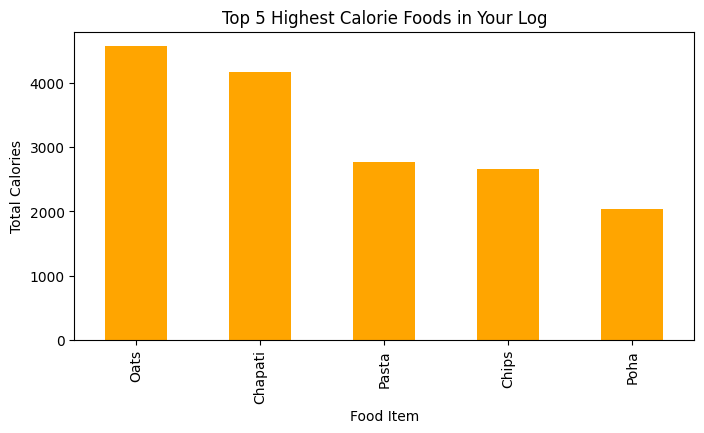

In [21]:
if not log.empty:
    top_foods = log.groupby("Food")["Calories"].sum().sort_values(ascending=False).head(5)
    plt.figure(figsize=(8,4))
    top_foods.plot(kind="bar", color="orange")
    plt.title("Top 5 Highest Calorie Foods in Your Log")
    plt.ylabel("Total Calories")
    plt.xlabel("Food Item")
    plt.show()
else:
    print("⚠️ No data for top foods chart.")

In [22]:
add_meal("Breakfast", "Oats")
add_meal("Lunch", "Pasta")


✅ Added: Breakfast - Oats (0 cal) on 2025-08-22
✅ Added: Lunch - Pasta (0 cal) on 2025-08-22
